In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data", one_hot=True)


total_epoch = 100
batch_size = 100
n_hidden = 256
n_input = 28 * 28
n_noise = 128
n_class = 10

X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_class])
Z = tf.placeholder(tf.float32, [None, n_noise])

def generator(noise, labels):
    with tf.variable_scope("generator"):
        inputs = tf.concat([noise, labels], 1)
        
        hidden = tf.layers.dense(inputs, n_hidden, 
                                 activation=tf.nn.relu)
        output = tf.layers.dense(hidden, n_input, 
                                 activation=tf.nn.sigmoid)
    return output


def discriminator(inputs, labels, reuse=None):
    with tf.variable_scope("discriminator") as scope:
        if reuse:
            scope.reuse_variables()
            
        inputs = tf.concat([inputs, labels], 1)
        hidden = tf.layers.dense(inputs, n_hidden, 
                                 activation=tf.nn.relu)
        output = tf.layers.dense(hidden, 1, 
                                 activation=None)
    return output


def get_noise(batch_size, n_noise):
    return np.random.uniform(-1., 1., size=[batch_size, n_noise])


G = generator(Z, Y)
D_real = discriminator(X, Y)
D_gene = discriminator(G, Y, True)

loss_D_real = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(
        logits=D_real, labels=tf.ones_like(D_real)))
loss_D_gene = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(
        logits=D_gene, labels=tf.zeros_like(D_gene)))

loss_D = loss_D_real + loss_D_gene

loss_G = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(
        logits=D_gene, labels=tf.ones_like(D_gene)))

vars_D = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 
                           scope="discriminator")
vars_G = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 
                           scope="generator")

train_D = tf.train.AdamOptimizer().minimize(loss_D, var_list=vars_D)
train_G = tf.train.AdamOptimizer().minimize(loss_G, var_list=vars_G)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


Epoch:  0000 D loss: 0.0069 G loss: 7.6233


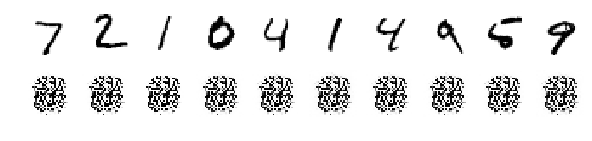

Epoch:  0001 D loss: 0.0118 G loss: 7.4060
Epoch:  0002 D loss: 0.0183 G loss: 8.0444
Epoch:  0003 D loss: 0.0230 G loss: 5.9401
Epoch:  0004 D loss: 0.0213 G loss: 6.9430
Epoch:  0005 D loss: 0.0144 G loss: 9.1453
Epoch:  0006 D loss: 0.0936 G loss: 7.1854
Epoch:  0007 D loss: 0.0375 G loss: 7.7603
Epoch:  0008 D loss: 0.0623 G loss: 7.7536
Epoch:  0009 D loss: 0.1392 G loss: 5.3157


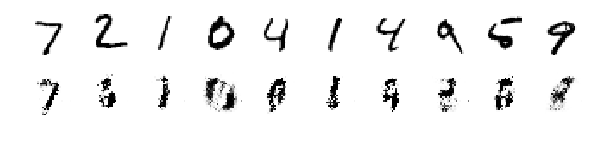

Epoch:  0010 D loss: 0.1814 G loss: 5.1406
Epoch:  0011 D loss: 0.3210 G loss: 5.1688
Epoch:  0012 D loss: 0.2808 G loss: 4.3635
Epoch:  0013 D loss: 0.2166 G loss: 5.0865
Epoch:  0014 D loss: 0.2513 G loss: 4.3192
Epoch:  0015 D loss: 0.3811 G loss: 3.3580
Epoch:  0016 D loss: 0.3368 G loss: 4.0780
Epoch:  0017 D loss: 0.5850 G loss: 3.9769
Epoch:  0018 D loss: 0.4474 G loss: 3.4956
Epoch:  0019 D loss: 0.9211 G loss: 2.8298


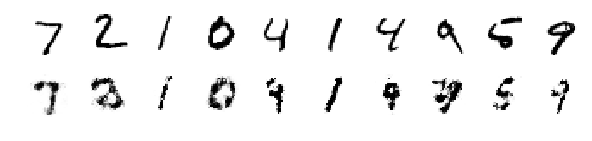

Epoch:  0020 D loss: 0.3539 G loss: 3.4326
Epoch:  0021 D loss: 0.6114 G loss: 2.8554
Epoch:  0022 D loss: 0.5774 G loss: 2.5885
Epoch:  0023 D loss: 0.5910 G loss: 3.1464
Epoch:  0024 D loss: 0.6035 G loss: 2.7769
Epoch:  0025 D loss: 0.6348 G loss: 2.2062
Epoch:  0026 D loss: 0.5378 G loss: 2.4692
Epoch:  0027 D loss: 0.6834 G loss: 2.4311
Epoch:  0028 D loss: 0.7052 G loss: 2.1070
Epoch:  0029 D loss: 0.7219 G loss: 2.6065


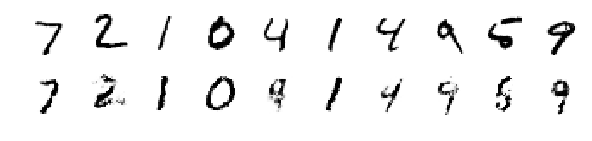

Epoch:  0030 D loss: 0.5630 G loss: 2.2258
Epoch:  0031 D loss: 0.7644 G loss: 1.8755
Epoch:  0032 D loss: 0.5034 G loss: 2.4446
Epoch:  0033 D loss: 0.7140 G loss: 2.2473
Epoch:  0034 D loss: 0.6341 G loss: 2.2962
Epoch:  0035 D loss: 0.8755 G loss: 2.3718
Epoch:  0036 D loss: 0.7909 G loss: 2.0689
Epoch:  0037 D loss: 0.9235 G loss: 2.1715
Epoch:  0038 D loss: 0.5203 G loss: 2.3454
Epoch:  0039 D loss: 0.7422 G loss: 1.7781


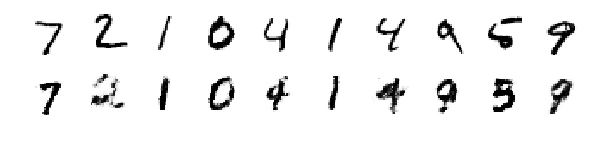

Epoch:  0040 D loss: 0.7414 G loss: 2.3709
Epoch:  0041 D loss: 0.6775 G loss: 2.0387
Epoch:  0042 D loss: 0.7873 G loss: 1.9124
Epoch:  0043 D loss: 0.6283 G loss: 2.2687
Epoch:  0044 D loss: 0.7914 G loss: 2.0649
Epoch:  0045 D loss: 0.6725 G loss: 2.4046
Epoch:  0046 D loss: 0.7653 G loss: 2.0031
Epoch:  0047 D loss: 0.6432 G loss: 2.3107
Epoch:  0048 D loss: 0.8159 G loss: 1.6836
Epoch:  0049 D loss: 0.6808 G loss: 1.9369


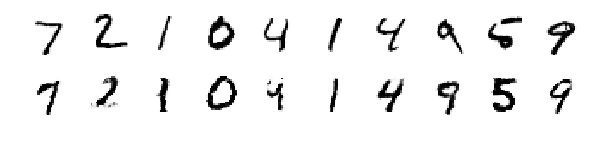

Epoch:  0050 D loss: 0.6465 G loss: 2.1059
Epoch:  0051 D loss: 0.5265 G loss: 2.3711
Epoch:  0052 D loss: 0.7081 G loss: 2.1966
Epoch:  0053 D loss: 0.8480 G loss: 2.0155
Epoch:  0054 D loss: 0.8903 G loss: 1.9841
Epoch:  0055 D loss: 0.5738 G loss: 2.2865
Epoch:  0056 D loss: 0.6587 G loss: 2.2175
Epoch:  0057 D loss: 0.6220 G loss: 2.0686
Epoch:  0058 D loss: 0.8042 G loss: 2.1960
Epoch:  0059 D loss: 0.7082 G loss: 1.9206


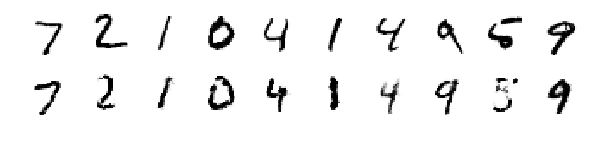

Epoch:  0060 D loss: 0.7381 G loss: 2.1391
Epoch:  0061 D loss: 0.7339 G loss: 2.0661
Epoch:  0062 D loss: 0.6293 G loss: 2.2610
Epoch:  0063 D loss: 0.7937 G loss: 2.2391
Epoch:  0064 D loss: 0.5988 G loss: 1.9630
Epoch:  0065 D loss: 0.7372 G loss: 1.9142
Epoch:  0066 D loss: 0.7812 G loss: 1.9618
Epoch:  0067 D loss: 0.8931 G loss: 1.8811
Epoch:  0068 D loss: 0.7712 G loss: 2.1740
Epoch:  0069 D loss: 0.7619 G loss: 1.9837


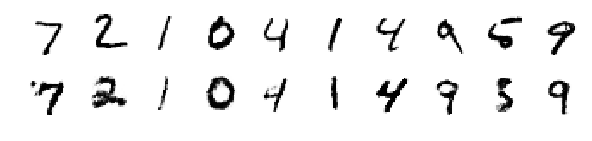

Epoch:  0070 D loss: 0.6203 G loss: 2.0829
Epoch:  0071 D loss: 0.7027 G loss: 2.0551
Epoch:  0072 D loss: 0.8134 G loss: 1.8176
Epoch:  0073 D loss: 0.7259 G loss: 2.1180
Epoch:  0074 D loss: 0.7388 G loss: 1.7407
Epoch:  0075 D loss: 0.7384 G loss: 2.2905
Epoch:  0076 D loss: 0.5788 G loss: 1.9320
Epoch:  0077 D loss: 0.6987 G loss: 1.8325
Epoch:  0078 D loss: 0.7323 G loss: 1.7993
Epoch:  0079 D loss: 0.6800 G loss: 2.2734


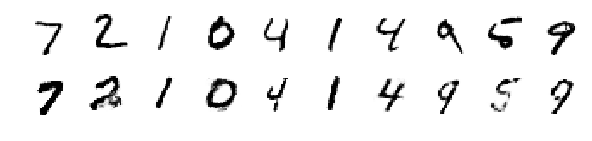

Epoch:  0080 D loss: 0.7071 G loss: 1.6406
Epoch:  0081 D loss: 0.6855 G loss: 2.2641
Epoch:  0082 D loss: 0.7115 G loss: 1.8746
Epoch:  0083 D loss: 0.7605 G loss: 1.7671
Epoch:  0084 D loss: 0.6969 G loss: 2.0253
Epoch:  0085 D loss: 0.6631 G loss: 2.1192
Epoch:  0086 D loss: 0.7028 G loss: 1.8333
Epoch:  0087 D loss: 0.6963 G loss: 2.0018
Epoch:  0088 D loss: 0.7741 G loss: 2.0755
Epoch:  0089 D loss: 0.5779 G loss: 2.2396


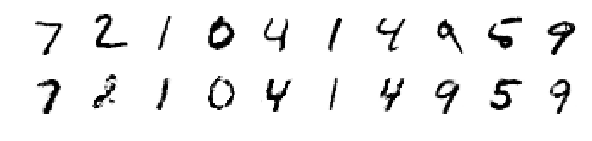

Epoch:  0090 D loss: 0.7882 G loss: 1.5655
Epoch:  0091 D loss: 0.7520 G loss: 1.8022
Epoch:  0092 D loss: 0.7628 G loss: 2.0618
Epoch:  0093 D loss: 0.6674 G loss: 1.8757
Epoch:  0094 D loss: 0.6484 G loss: 2.1328
Epoch:  0095 D loss: 0.6367 G loss: 2.1029
Epoch:  0096 D loss: 0.5531 G loss: 2.3024
Epoch:  0097 D loss: 0.7365 G loss: 2.4304
Epoch:  0098 D loss: 0.7938 G loss: 1.8725
Epoch:  0099 D loss: 0.7667 G loss: 2.0933


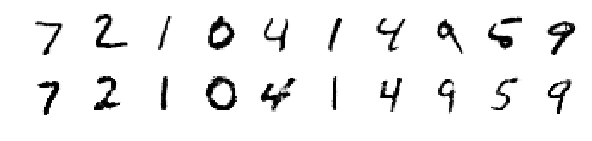

Optimization completed!


In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples / batch_size)
loss_val_D, loss_val_G = 0, 0

for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)
        
        _, loss_val_D = sess.run([train_D, loss_D], feed_dict={X: batch_xs,
                                                               Y: batch_ys, 
                                                               Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G], feed_dict={Y: batch_ys, 
                                                               Z: noise})
    print("Epoch: ", "{:04d}".format(epoch), 
          "D loss: {:.4f}".format(loss_val_D), 
          "G loss: {:.4f}".format(loss_val_G))
    
    if epoch == 0 or (epoch + 1) % 10 == 0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G, feed_dict={Y: mnist.test.labels[:sample_size], 
                                         Z: noise})
        
        fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))
        
        for i in range(sample_size):
            ax[0][i].set_axis_off()
            ax[1][i].set_axis_off()
            
            ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
            ax[1][i].imshow(np.reshape(samples[i], (28, 28)))
            
        plt.show()

print("Optimization completed!")